<b> Wind Rose Plotter

This is a code for plotting the wind rose graph from wind data.

Data format:

    - The data file should be a CSV file
    - The file should have 4 columns in the following order: Year, Month, Wind Speed, Wind Direction.
    - The columns should have headers but the names in the headers don't matter.
    - Missing data is OK.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# User Input 

unit = 'knots'
location = "Mylocation"
userbins = [0,1,4,7,11,17,21]

<b>1. Data Preprocessing

In [8]:
# Reading the data file
wind = pd.read_csv("wind.csv")
wind.dropna(inplace=True)
wind.head()

,year,month,in Knots,Wind direction (degree)
0,1979,1,11.040214,259.180
1,1979,1,10.969731,264.110
2,1979,1,10.980947,269.062
3,1979,1,11.073551,273.962
4,1979,1,11.245561,278.744


In [9]:
# Renaming the columns and sorting the data by date
wind.columns = ['year','month','speed','direc']
wind.sort_values(['year', 'month'],inplace=True)

In [10]:
# Getting a data summary
total_count = wind.shape[0]
calm_count = wind.query('speed>=0' and 'speed<1').shape[0]
print('This dataset has a total of {} observations of which {} have calm winds'.format(total_count,calm_count))

This dataset has a total of 350635 observations of which 4633 have calm winds


In [11]:
# Creating a function to turn the wind direction from degrees to: North, South,...
def direc_map(x):
    if (x >= 348.75 and x < 360) or (x >= 0 and x < 11.25):
        return 'N'
    elif x >= 11.25 and x < 33.75:
        return 'NNE'
    elif x >= 33.75 and x < 56.25:
        return 'NE'
    elif x >= 56.25 and x < 78.75:
        return 'ENE'
    elif x >= 78.75 and x < 101.25:
        return 'E'
    elif x >= 101.25 and x < 123.75:
        return 'ESE'
    elif x >= 123.75 and x < 146.25:
        return 'SE'
    elif x >= 146.25 and x < 168.75:
        return 'SSE'
    elif x >= 168.75 and x < 191.25:
        return 'S'    
    elif x >= 191.25 and x < 213.75:
        return 'SSW'
    elif x >= 213.75 and x < 236.25:
        return 'SW'
    elif x >= 236.25 and x < 258.75:
        return 'WSW'
    elif x >= 258.75 and x < 281.25:
        return 'W'
    elif x >= 281.25 and x < 303.75:
        return 'WNW'
    elif x >= 303.75 and x < 326.25:
        return 'NW'
    elif x >= 326.25 and x < 348.75:
        return 'NNW'

In [12]:
# Adding the wind direction column
wind['DIRECTION'] = wind['direc'].apply(direc_map)
wind.head()

,year,month,speed,direc,DIRECTION
0,1979,1,11.040214,259.180,W
1,1979,1,10.969731,264.110,W
2,1979,1,10.980947,269.062,W
3,1979,1,11.073551,273.962,W
4,1979,1,11.245561,278.744,W


In [15]:
# categorizing the wind speed into bins specified by the user
wind['speed_bins'] = pd.cut(wind['speed'],userbins)
wind.head()

,year,month,speed,direc,DIRECTION,speed_bins
0,1979,1,11.040214,259.180,W,"(11, 17]"
1,1979,1,10.969731,264.110,W,"(7, 11]"
2,1979,1,10.980947,269.062,W,"(7, 11]"
3,1979,1,11.073551,273.962,W,"(11, 17]"
4,1979,1,11.245561,278.744,W,"(11, 17]"


In [17]:
# Creating a pivot showing the cumulative % of wind speeds for each direction
wind_pivot = wind.pivot_table('speed',index='speed_bins',columns='DIRECTION',aggfunc='count')
wind_pivot.fillna(0,inplace=True)
wind_pivot = wind_pivot / wind.shape[0] *100
wind_pivot = wind_pivot.cumsum()

# Reorganizing the columns according to the order we want
wind_pivot2 = wind_pivot[['E','ENE','NE','NNE','N','NNW','NW','WNW','W','WSW',
                    'SW','SSW','S','SSE','SE','ESE']]

wind_pivot

DIRECTION,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
speed_bins,,,,,,,,,,,,,,,,
"(0, 1]",0.076718,0.074151,0.090978,0.065880,0.064454,0.074722,0.072725,0.073581,0.096682,0.089837,0.092974,0.093259,0.099249,0.083848,0.084418,0.087555
"(1, 4]",1.886862,1.381494,2.280149,0.660231,0.983929,0.736949,0.733812,0.929171,1.756527,2.313517,2.075948,1.583698,1.479886,1.304776,1.149629,1.449656
"(4, 7]",7.099120,3.560968,9.215851,0.834486,1.613359,0.981077,1.075477,1.939339,2.806907,8.110713,4.714874,2.436437,2.736464,3.878962,3.455160,3.512484
"(7, 11]",14.122948,4.872018,17.664808,0.836197,1.735423,0.995907,1.123105,3.067863,2.883911,12.783664,5.858799,2.482353,3.043621,8.357124,8.046829,5.285839
"(11, 17]",14.908381,4.906242,18.170177,0.836197,1.735423,0.995907,1.123961,3.577795,2.884196,12.829866,5.865929,2.483209,3.048469,10.277354,10.610464,5.582728
"(17, 21]",14.908381,4.906242,18.170177,0.836197,1.735423,0.995907,1.123961,3.601181,2.884196,12.829866,5.865929,2.483209,3.048469,10.336104,10.682619,5.585010


In [18]:
# Changing the index to make it easier to plot
wind_pivot2.index = [i for i in range(0,len(userbins)-1)]

<b>2. Wind Rose Plotting

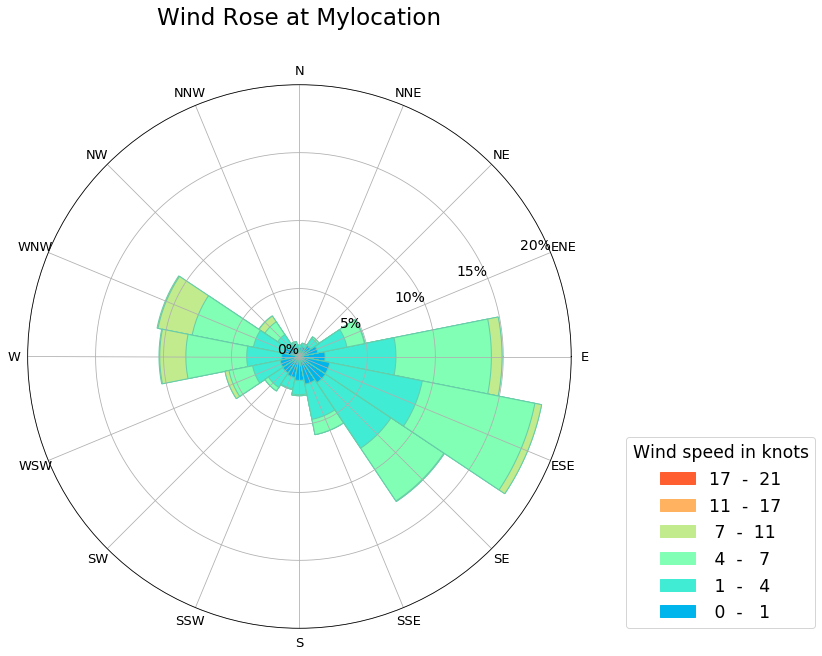

In [19]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111,projection='polar')

# setting palette and title 

ax.set_title('Wind Rose at %s'%location,{'y':1.1,'fontsize': 23,'fontname':'DejaVu Sans'})


palette = sns.color_palette('rainbow', n_colors=len(userbins))

# setting x axis
        
ax.set_xticks([i*np.pi/8 for i in range(0,16)])
ax.set_xticklabels(['E','ENE','NE','NNE','N','NNW','NW','WNW','W','WSW',
                    'SW','SSW','S','SSE','SE','ESE'],fontsize=13)


# setting y axis
yticks = [5*i for i in range (0,int(wind_pivot2.iloc[-1].max())%5+2)]
ax.set_yticks(yticks)
ax.set_yticklabels([str(i)+'%' for i in yticks],fontsize=14,
                   horizontalalignment='right')
ax.set_ylim(0,max(yticks))



for i in range(0,16):
    direction = i*np.pi/8
    for j in range(len(wind_pivot2)-1,-1,-1):
        ax.bar(direction,wind_pivot2.iloc[j][i],width=2*np.pi/16,
               bottom=0,color=palette[j],edgecolor='mediumaquamarine')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


#Creating a legend:

from matplotlib.patches import Patch

labels = ['%2.0f  -  %2.0f'%(userbins[i],userbins[i+1]) for i in range(0,len(userbins)-1)]
patches = [Patch(color=palette[-i],label=labels[-i]) for i in range(1,len(labels)+1)]
title = 'Wind speed in %s'%(unit)
plt.legend(handles=patches,loc=(1.1,0),title=title,title_fontsize='xx-large',fontsize='xx-large')

plt.savefig('Wind Rose at %s.jpg'%location,quality=95,orientation='landscape',bbox_inches='tight')